In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_json("data/modelling_customerfeedback.json",lines=True)
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [2]:
missing_data = df.isna().sum()
missing_data

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [3]:
missing_data*100/len(df)

item_id            0.000000
waist             96.518903
size               0.000000
quality            0.082136
cup size           7.555260
hips              32.281677
bra size           7.268994
category           0.000000
bust              85.681846
height             1.337118
user_name          0.000000
length             0.042276
fit                0.000000
user_id            0.000000
shoe size         66.282160
shoe width        77.525063
review_summary     8.122962
review_text        8.122962
dtype: float64

In [4]:
df.drop(['waist','bust','user_name','review_text','review_summary','shoe size','shoe width'],axis=1,inplace=True)

X = df.drop('fit',axis=1)
y = df['fit']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=6)

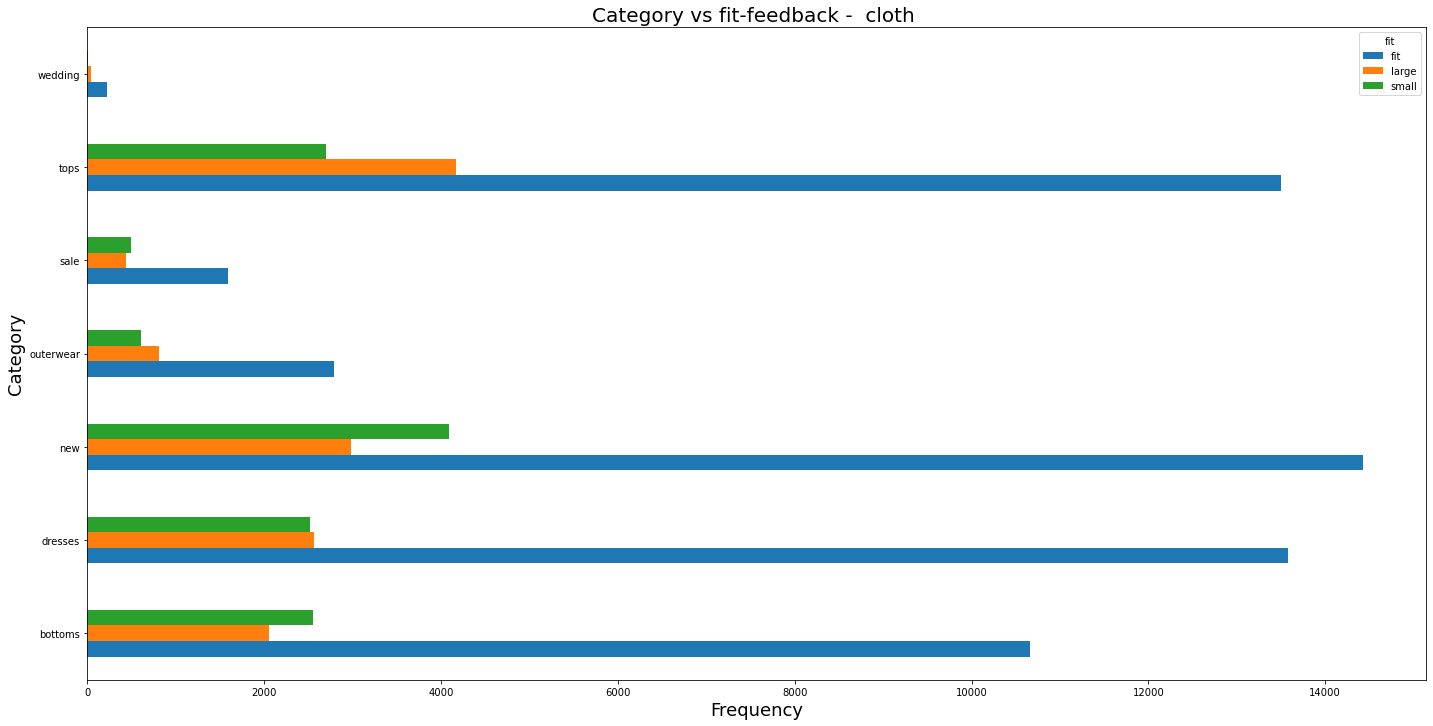

In [5]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)



g_by_category = df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
plot_barh(cat_fit, 'fit')

#### Category vs Length

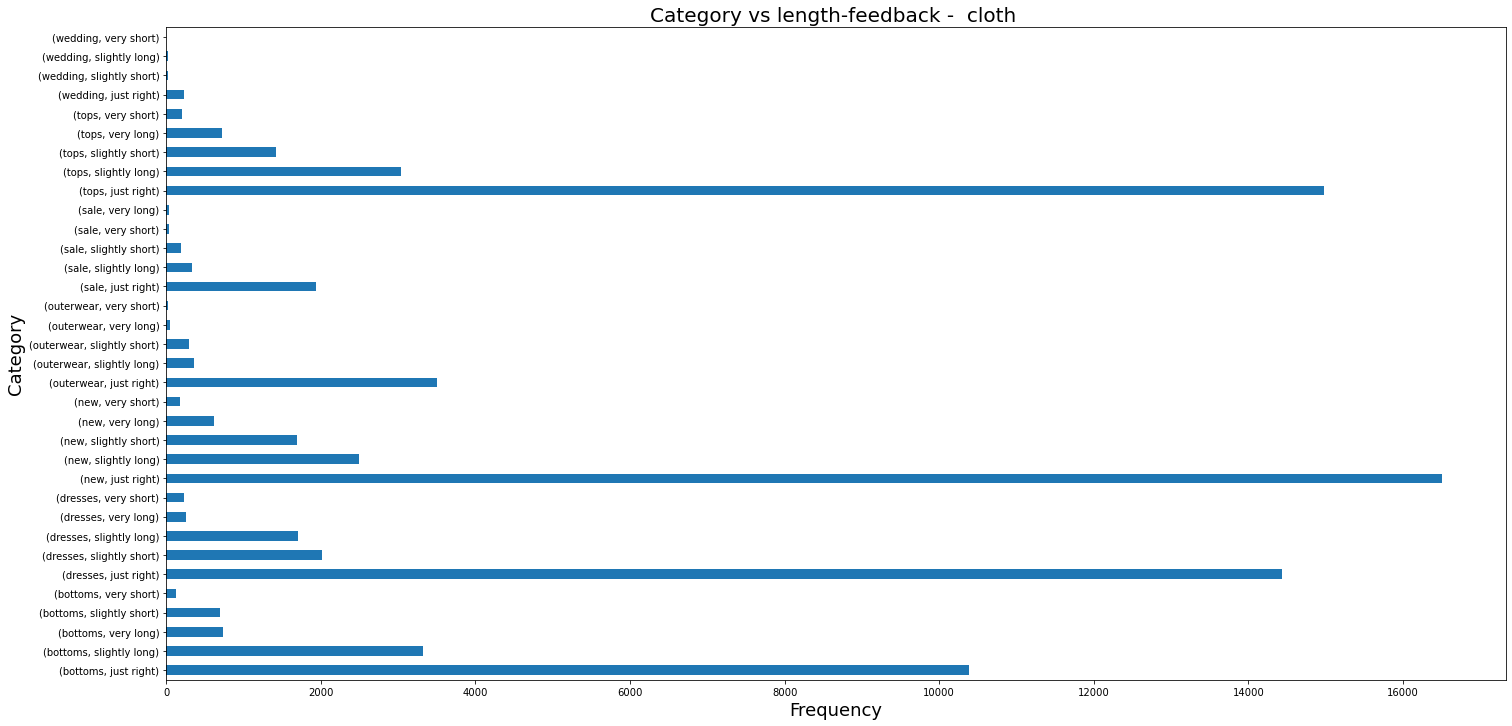

In [6]:
cat_len = g_by_category['length'].value_counts()
cat_len.unstack()
plot_barh(cat_len,'length')

#### Cleaning height columns

In [7]:
def get_cms(x):
    if type(x) == type(1.0):
        return

    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
X_train['height'] = X_train['height'].apply(get_cms)
X_test['height'] = X_test['height'].apply(get_cms)
X_train.head()

,item_id,size,quality,cup size,hips,bra size,category,height,length,user_id
8540,160625,3,5.0,b,38.0,32.0,dresses,172.72,slightly long,276443
30834,407044,8,2.0,b,35.0,34.0,new,165.10,just right,980141
6095,152513,15,2.0,d,45.0,36.0,new,170.18,just right,682176
14462,171740,7,4.0,d,37.0,32.0,dresses,152.40,just right,459825
37896,416942,26,4.0,c,NaN,42.0,new,165.10,just right,151852


In [8]:
X_train.isna().sum()

item_id         0
size            0
quality        44
cup size     4150
hips        17878
bra size     3986
category        0
height        728
length         26
user_id         0
dtype: int64

##### Dropped rows of columns which had low no of null values. 
##### Replaced null values with mean and mode for other columns.

In [9]:
X_train.isna().sum()
X_train.dropna(subset=['height','length','quality'],inplace=True)
X_test.dropna(subset=['height','length','quality'],inplace=True)
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

X_train['bra size'].fillna((X_train['bra size'].mean()), inplace=True)
X_test['bra size'].fillna((X_test['bra size'].mean()), inplace=True)

X_train['hips'].fillna((X_train['hips'].mean()), inplace=True)
X_test['hips'].fillna((X_test['hips'].mean()), inplace=True)

mode_1 = X_train['cup size'].mode()[0]
mode_2 = X_test['cup size'].mode()[0]
X_train['cup size']=X_train['cup size'].replace(np.nan,mode_1)
X_test['cup size']=X_test['cup size'].replace(np.nan,mode_2)

print(X_train.isnull().sum())

item_id     0
size        0
quality     0
cup size    0
hips        0
bra size    0
category    0
height      0
length      0
user_id     0
dtype: int64


In [10]:
X_train = pd.get_dummies(X_train,columns=['category','cup size','length'])
X_test = pd.get_dummies(X_test,columns=['category','cup size','length'])

X_train.head()

,item_id,size,quality,hips,bra size,height,user_id,category_bottoms,category_dresses,category_new,...,cup size_dddd/g,cup size_h,cup size_i,cup size_j,cup size_k,length_just right,length_slightly long,length_slightly short,length_very long,length_very short
8540,160625,3,5.0,38.000000,32.0,172.72,276443,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30834,407044,8,2.0,35.000000,34.0,165.10,980141,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6095,152513,15,2.0,45.000000,36.0,170.18,682176,0,0,1,...,0,0,0,0,0,1,0,0,0,0
14462,171740,7,4.0,37.000000,32.0,152.40,459825,0,1,0,...,0,0,0,0,0,1,0,0,0,0
37896,416942,26,4.0,40.364358,42.0,165.10,151852,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(random_state=6)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)


0.6848734812172556


In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average=None)
print(score,'\n',precision)

0.5770073941961134 
 [0.72880125 0.28523339 0.26586169]


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# parameters for grid search
parameters = {'max_depth':[5,10],
              'criterion':['gini','entropy'],
              'min_samples_leaf':[0.5,1]}


In [14]:
model = DecisionTreeClassifier(random_state=6)
grid = GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.6955003158324973


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=6)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.6965407052353881


In [ ]:
RandomForestClassifier()
n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,

In [30]:
parameters = {
    'n_estimators':[100,150,200],
    'max_depth':[10,40,50,60],
    'min_samples_leaf':[1,2]
}

In [32]:
grid = GridSearchCV(estimator=rf,param_grid=parameters,n_jobs=6,verbose=1)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:  8.7min finished


0.7027830416527329


In [33]:
grid.best_params_

{'max_depth': 50, 'min_samples_leaf': 2, 'n_estimators': 200}

In [34]:
mean = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']
for m,p in zip(mean,params):
    print(m,p)

0.7026937931207924 {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
0.702858365384403 {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 150}
0.7027486377222368 {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
0.702437749646693 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}
0.702949813184897 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 150}
0.7025474823252866 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
0.69843267242013 {'max_depth': 40, 'min_samples_leaf': 1, 'n_estimators': 100}
0.6986704126225621 {'max_depth': 40, 'min_samples_leaf': 1, 'n_estimators': 150}
0.6987070191658965 {'max_depth': 40, 'min_samples_leaf': 1, 'n_estimators': 200}
0.7043213914044786 {'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 100}
0.7043579828985306 {'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 150}
0.7048151667202979 {'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 200}
0.698560691648966 {'max_depth': 5